In [1]:
from sklearn.feature_extraction.text  import CountVectorizer
from sklearn.feature_extraction.text  import TfidfTransformer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import spacy

* Firstly, we read the data for the Greek Parliament proceedings.
* We print the first lines in order to have a clear view on the structure of the data.

In [2]:
data=pd.read_csv("Greek_Parliament_Proceedings_1989_2019.csv")
data.head()

,member_name,sitting_date,parliamentary_period,parliamentary_session,parliamentary_sitting,political_party,speaker_info,speech
0,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...
1,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...
2,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,"Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ..."
3,NaN,1989-07-03,period 5,session 1,sitting 1,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
4,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...


* We print the political parties from all the dataset.
* we can observe that there are some observations that they are not politcal parties.
* Also, there are some political parties which appear twice with a slighlty different name.


In [3]:
data['political_party'].unique()

array(['πανελληνιο σοσιαλιστικο κινημα', 'βουλη', 'νεα δημοκρατια',
       'κομμουνιστικο κομμα ελλαδας εσωτερικου',
       'κομμουνιστικο κομμα ελλαδας',
       'συνασπισμος της αριστερας των κινηματων και της οικολογιας', nan,
       'λαικος ορθοδοξος συναγερμος',
       'οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων εναλλακτικων οργανωσεων)',
       'ανεξαρτητοι (εκτος κομματος)', 'δημοκρατικη ανανεωση',
       'αντιπολιτευση', 'πολιτικη ανοιξη', 'δημοκρατικο κοινωνικο κινημα',
       'συνασπισμος ριζοσπαστικης αριστερας', 'δημοκρατικη αριστερα',
       'ανεξαρτητοι ελληνες - πανος καμμενος',
       'ανεξαρτητοι δημοκρατικοι βουλευτες',
       'λαικος συνδεσος - χρυση αυγη', 'το ποταμι',
       'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια',
       'λαικη ενοτητα',
       'δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)',
       'ενωση κεντρωων'], dtype=object)

* We create a table with the speeches per politcal party in order to have a more analytical approach about the distribution of the speeches per party in the dataset.

In [4]:
data.groupby('political_party')['speech'].count().to_frame().sort_values(by='speech',ascending=False)


,speech
political_party,
νεα δημοκρατια,385634
πανελληνιο σοσιαλιστικο κινημα,377680
συνασπισμος ριζοσπαστικης αριστερας,126572
κομμουνιστικο κομμα ελλαδας,78631
βουλη,45876
συνασπισμος της αριστερας των κινηματων και της οικολογιας,35891
ανεξαρτητοι (εκτος κομματος),29951
λαικος ορθοδοξος συναγερμος,23686
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα),22991


* We convert the column of the dates from strings to datetime objects and we create a new column with the year of the speech.

In [5]:
data['sitting_date']=pd.to_datetime(data['sitting_date'])
data['year'] = data['sitting_date'].dt.year

* We create a table with the speeches per year.
* we plot this table in order to have a better idea about the distribution of the speeches during the years.

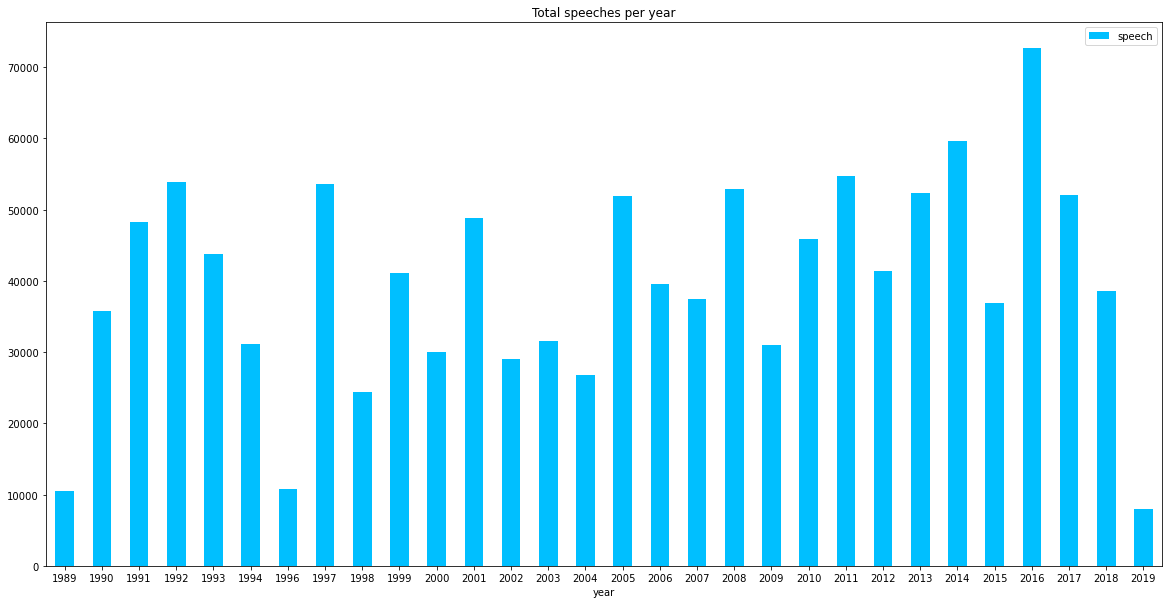

In [6]:
speech_years=data.groupby('year')['speech'].count().to_frame()
speech_years.plot(kind='bar', color=('deepskyblue'), figsize=(20, 10),rot=0,
               title='Total speeches per year')

* Also , we create a table with the number of speeakers per political party.

In [7]:
data.groupby('political_party')['member_name'].nunique().to_frame().sort_values(by='member_name',ascending=False)

,member_name
political_party,
νεα δημοκρατια,448
πανελληνιο σοσιαλιστικο κινημα,435
συνασπισμος ριζοσπαστικης αριστερας,212
ανεξαρτητοι (εκτος κομματος),122
κομμουνιστικο κομμα ελλαδας,58
συνασπισμος της αριστερας των κινηματων και της οικολογιας,41
λαικος συνδεσος - χρυση αυγη,26
ανεξαρτητοι ελληνες - πανος καμμενος,22
λαικος ορθοδοξος συναγερμος,19


* Since our dataset is too large, we decide keep only the last four years which is approximately 200 thousands observations which is an adequate number in order to reduce the execution time.

In [8]:
data=data.loc[data['year']>2014]
print(data.shape)

(208090, 9)


* From the following graph, we can observe the amount of speeches per year.
* It seems that number of speeches on 2016 , it was the largest in these 4 years while for the 2019 there weren't so much data.

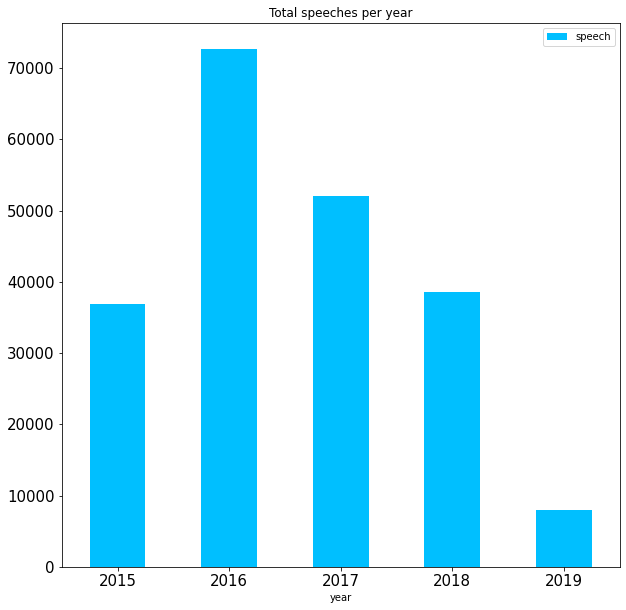

In [9]:
speech=data.groupby(['year'])['speech'].count().to_frame()
speech.plot(kind='bar', color=('deepskyblue'), figsize=(10,10),rot=0,
               title='Total speeches per year',fontsize=15)

* Also, we create a table with the number of speeches per political party and we choose a plot to visualize it in order to understand better the differences between the political parties. 
* We can observe that most of the politcal parties are above the 10000 observations.
* We might remove from the model those political parties who have few observations , since it will be difficult to be classified.

In [10]:
over14=data.groupby(['political_party'])['speech'].count().to_frame().sort_values(by='speech',ascending=False)
over14

,speech
political_party,
συνασπισμος ριζοσπαστικης αριστερας,71714
νεα δημοκρατια,40171
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα),22991
κομμουνιστικο κομμα ελλαδας,18924
ανεξαρτητοι (εκτος κομματος),14029
λαικος συνδεσος - χρυση αυγη,10419
ενωση κεντρωων,9888
το ποταμι,7672
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια,5521


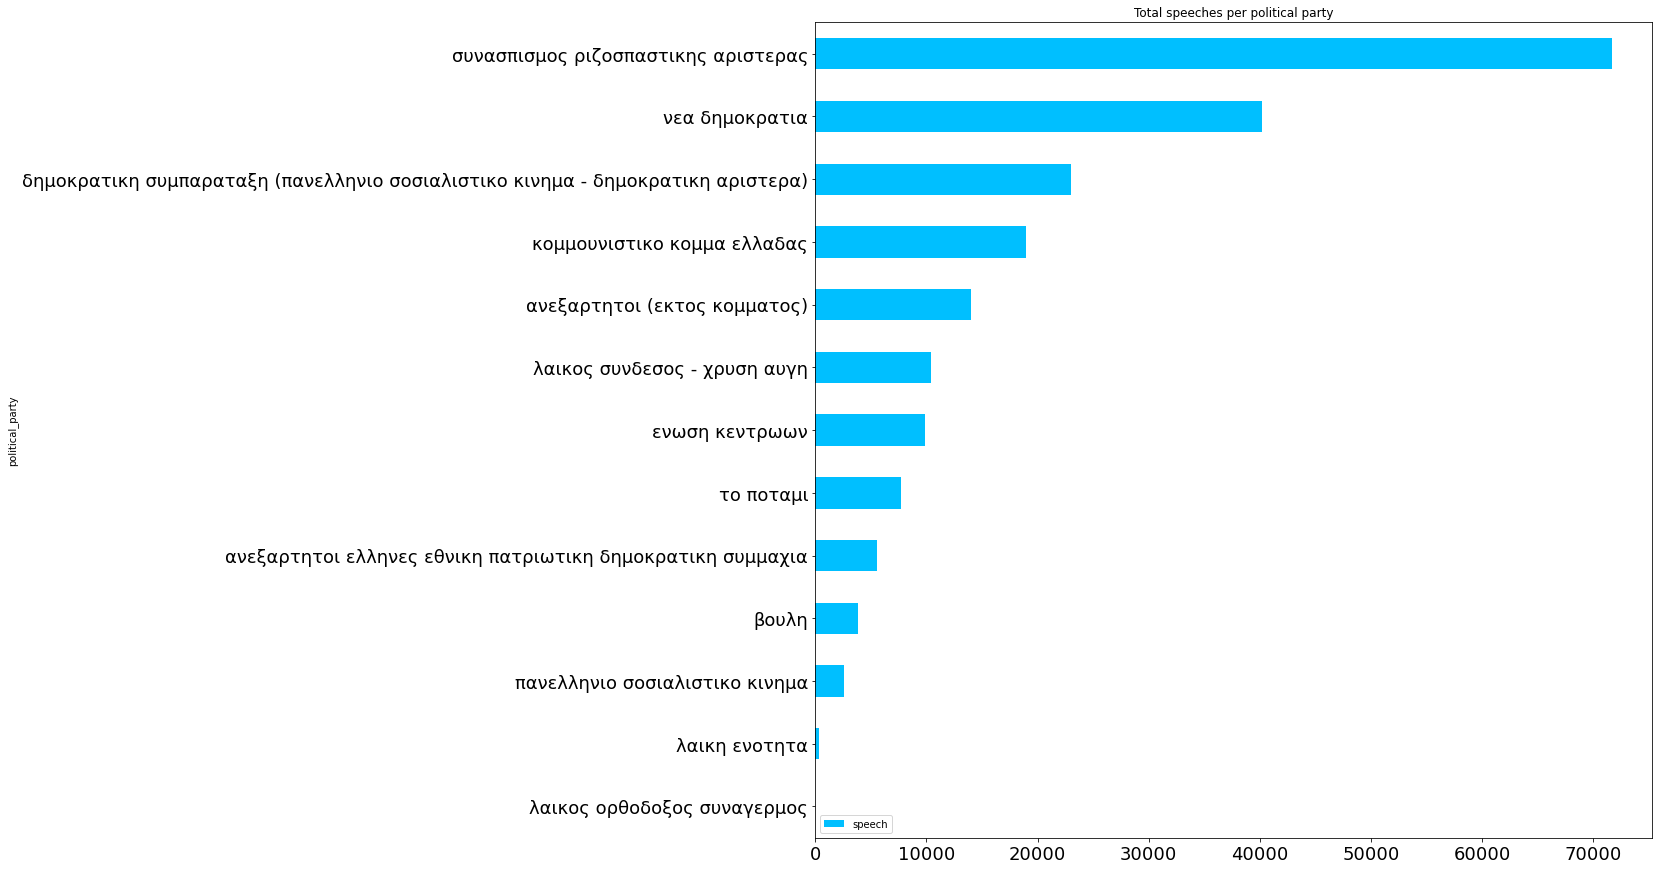

In [11]:

data.groupby(['political_party'])['speech'].count().to_frame().sort_values(by='speech',ascending=True)\
.plot(kind='barh', color=('deepskyblue'), figsize=(15,15),rot=0,
               title='Total speeches per political party',fontsize=18)

Also, we create a plot with the members per political party in which we can observe that 'συνασπιμος  ριζοσπαστικης αριστερας and νεα δημοκρατια have the most members in comparison to other political parties.

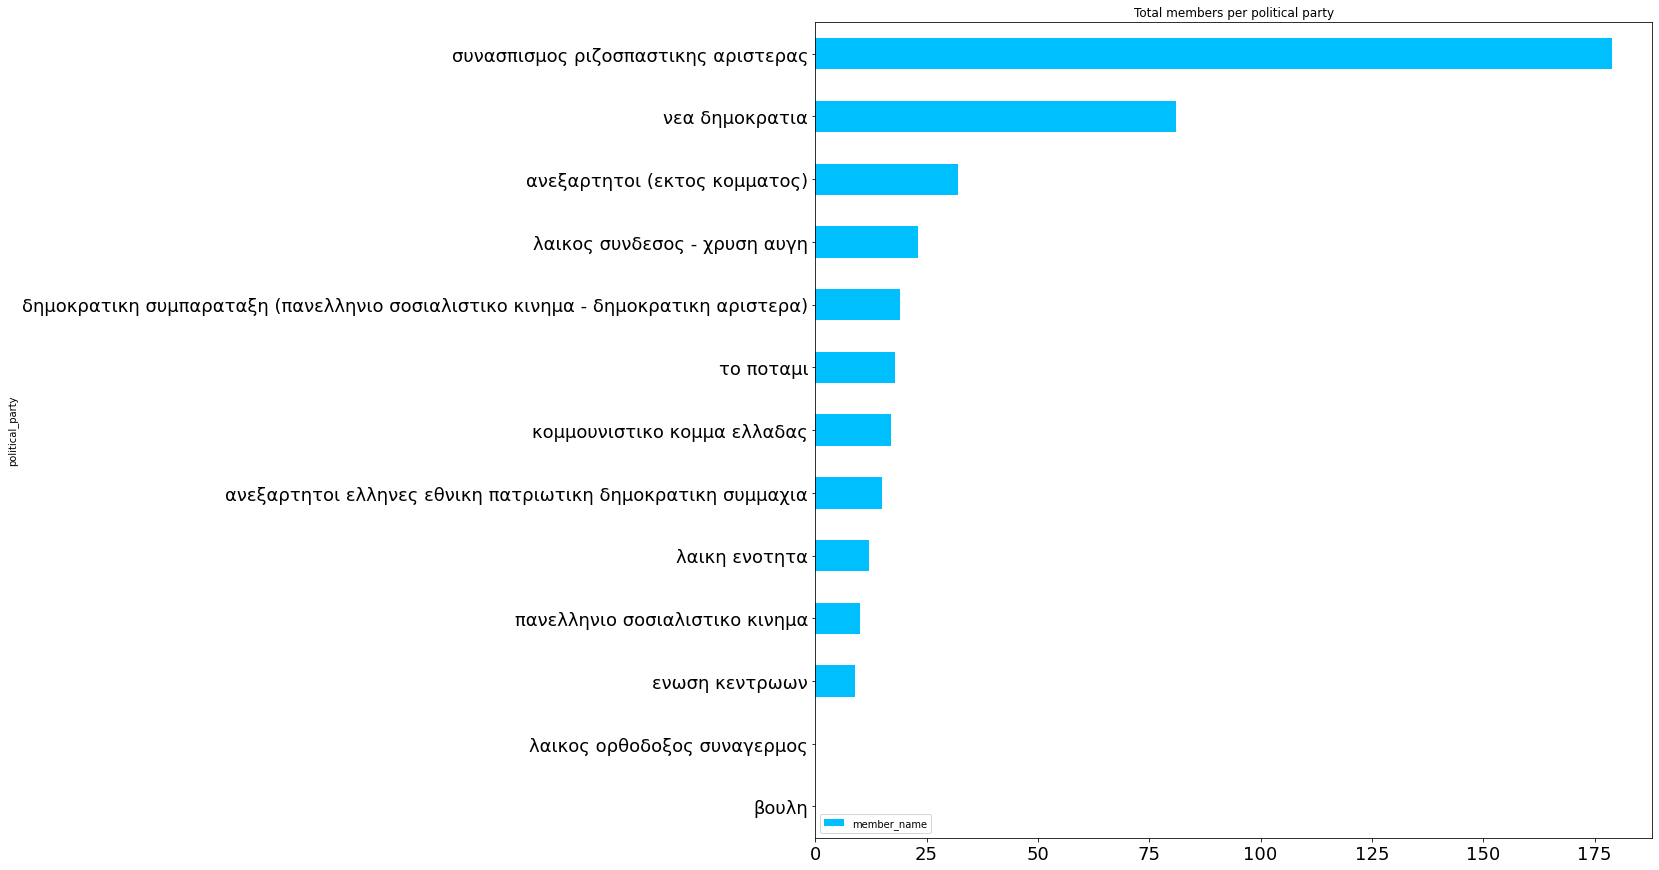

In [12]:
members=data.groupby('political_party')['member_name'].nunique().to_frame().sort_values(by='member_name',ascending=True)
members.plot(kind='barh', color=('deepskyblue'), figsize=(15,15),rot=0,
               title='Total members per political party',fontsize=18)

* From our previous analysis and the results that we took during our tests ,we decided to exclude from the dataset some political parties which they do not have enough observations since the algorithm was unable to get results for it.These plotical parties are λαικη ενοτητα, ενωση κεντρωων, το ποταμι, ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια , λαικος ορθοδοξος συναγερμο.During our testing,these political parties because of the small number of observations  had a really low recall number which affected the f1 score.

* Also,we exclude 'ανεξαρτητοι (εκτος κομματος)' and 'ανεξαρτητοι δημοκρατικοι βουλευτες' since there are independent members and it will be difficult for the algorithm to classify them since they are not from one political party and have different beliefs.


In [14]:
data=data.loc[data['political_party']!= 'βουλη']
data=data.loc[data['political_party']!= 'ανεξαρτητοι (εκτος κομματος)']
data=data.loc[data['political_party']!= 'λαικος ορθοδοξος συναγερμος']
data=data.loc[data['political_party']!= 'ανεξαρτητοι δημοκρατικοι βουλευτες']
data=data.loc[data['political_party']!= 'λαικη ενοτητα']
data=data.loc[data['political_party']!= 'ενωση κεντρωων']
data=data.loc[data['political_party']!= 'το ποταμι']
data=data.loc[data['political_party']!= 'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια']

* we decide to replace 'πανελληνιο σοσιαλιστικο κινημα' and 'δημοκρατικη αριστερα' with 'δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)' since those two politcal parties were partnered and represent one politcal party.

In [15]:
data['political_party'].loc[data['political_party'] == 'πανελληνιο σοσιαλιστικο κινημα']='δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)'
data['political_party'].loc[data['political_party'] == 'δημοκρατικη αριστερα']='δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)'


C:\Users\georg\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


* we delete any not available observations from the column with the speeches and the politcal parties.

In [16]:
data = data[data['political_party'].notna()]
data = data[data['speech'].notna()]

* We separate the data in training set and test set by keeping the 80% for training and the 20% of the dataset for testing.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data['speech'], data['political_party'], test_size= 0.2, random_state=1)

We import the greek language package through the library spacy and in order to install the following package, we ran these commmands in the anacoda prompt
* conda install -c conda-forge spacy
* python -m spacy download el_core_news_sm
* We load the greek language package through spacy.
* We import from spacy the greek stop words which will use in our model in order to remove common words.
* We will also use the word.lemma in order to leave only the base of greeks words.
* Also, it should be mentioned that we used a lemmatizer function in our countvecorizer but it did not improve our score and because of its large running time we decided to exclude it from the model.

In [18]:
from spacy.lang.el import STOP_WORDS
nlp = spacy.load("el_core_news_sm")
STOP_WORDS_PARLIAMENT=STOP_WORDS.union({'βουλη'})
stop_words_str=''.join(STOP_WORDS_PARLIAMENT)
stop_words_lemma= set(word.lemma for word in nlp(stop_words_str))

def lemmatizer(text):
    return [word.lemma_ for word in nlp(text)]

* Next we are going to create a pipeline in which we include a countvectorizer that will convert the text into numbers and will remove common greek words.
* Also, we use the tfidf transformer which will transform the count matrix to a tf-idf representation.
* The last part of the pipeline wil be the logisitc regression algorithm for multiclass classification problems and with the 'saga' solver.
* Then, we will fit the model to the training set and we will compute the training accuracy score.
* We can observe that  the training accuracy is aproximately 0.625.

In [19]:
log=Pipeline([('vect',CountVectorizer(stop_words=stop_words_lemma)),
               ('trans',TfidfTransformer()),
               ('classifier',LogisticRegression(solver='saga',n_jobs=8))])
log= log.fit(X_train, y_train)
print('training accuracy:{}'.format(log.score(X_train,y_train)))

training accuracy:0.6249287962824164


Next we are going to implement 5 fold cross validation to our training set in order to check the efficiancy of the model.

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log, X_train, y_train, cv=5, scoring='accuracy')
scores

array([0.56408335, 0.55715035, 0.55411483, 0.56082297, 0.55973617])

Now, we will test our model to testing dataset in order to understand how it is performing in unseen data.
We can see that the accuracy score is 0.566.

In [21]:
predictions_log = log.predict(X_test)
# Use accuracy_score function to get the accuracy
print("Accuracy Score -> ",accuracy_score(predictions_log, y_test))

Accuracy Score ->  0.565925170883799


* Also, we are going to create a matrix with the precision, recall and f1 score results.
* We can observe that the f1 score is better in the class with the most observations while there is small precision and especially smaller recall  in the other classes.



In [22]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions_log))
print()
print(metrics.confusion_matrix(y_test, predictions_log))

                                                                                 precision    recall  f1-score   support

δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       0.60      0.21      0.32      5072
                                                    κομμουνιστικο κομμα ελλαδας       0.50      0.37      0.42      3774
                                                   λαικος συνδεσος - χρυση αυγη       0.47      0.38      0.42      2104
                                                                 νεα δημοκρατια       0.54      0.41      0.46      8131
                                            συνασπισμος ριζοσπαστικης αριστερας       0.59      0.86      0.70     14275

                                                                       accuracy                           0.57     33356
                                                                      macro avg       0.54      0.45      0.46     33356
                              

* Next we are going to create another pipeline in which we include a countvectorizer which will convert the text into numbers and will remove some greek words.

* Also, we will use again the tfidf transformer 
* The last part of this pipeline wil be the multinomial Naive Bayes algorithm.
* Then, we will fit the model to the training set and we will compute the training accuracy score.
* We can observe that the training accuracy is aproximately 0.48 which is lower than the previous model.

In [23]:
NB=Pipeline([('vect',CountVectorizer(stop_words=stop_words_lemma)),
               ('trans',TfidfTransformer()),
               ('classifier',MultinomialNB())])
NB.fit(X_train,y_train)
print('training accuracy:{}'.format(NB.score(X_train,y_train)))

training accuracy:0.47950082446409836


* We will also implement 5 fold cross validation to our training set in order to check the efficiancy of the model.

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB, X_train, y_train, cv=5, scoring='accuracy')
scores

array([0.46278669, 0.46537251, 0.46436067, 0.46451057, 0.46597212])

* Now, we will test our model to testing dataset in order to understand how it is performing in unseen data.
* We can observe that the accuracy score is 0.46.

In [38]:
predictions_NB = NB.predict(X_test)
# Use accuracy_score function to get the accuracy
print("Accuracy Score -> ",accuracy_score(predictions_svc, y_test))

Accuracy Score ->  0.46258544189950834


* We are going to create a matrix with the precision, recall and f1 score results.
* We can observe that the f1 score is better in the class with the most observations but all the political parties have lower f1-score in comparison with the logistic regression.
* We can see for the confusion matrix that especially for the 'λαικος συνδεσος - χρυση αυγη' the algorthm was unabale to make correct predictions.

In [39]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions_NB))
print()
print(metrics.confusion_matrix(y_test, predictions_NB))

                                                                                 precision    recall  f1-score   support

δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       0.90      0.01      0.01      5072
                                                    κομμουνιστικο κομμα ελλαδας       0.36      0.17      0.23      3774
                                                   λαικος συνδεσος - χρυση αυγη       1.00      0.00      0.00      2104
                                                                 νεα δημοκρατια       0.31      0.08      0.13      8131
                                            συνασπισμος ριζοσπαστικης αριστερας       0.48      0.99      0.65     14275

                                                                       accuracy                           0.46     33356
                                                                      macro avg       0.61      0.25      0.20     33356
                              

* Next we are going to create another pipeline in which we include a countvectorizer which will convert the text into numbers and the remove common greek words just like the previous cases.

* Also, we will use again the tfidf transformer.

* The last part of this pipeline wil be the stohastic gradient descent algorithm with a parameter alpha=0.001.

* Then, we will fit the model to the training set and we will compute the training accuracy score.

* We can observe that the training accuracy is aproximately 0.49.

In [27]:
sgdc=Pipeline([('vect',CountVectorizer(stop_words=stop_words_lemma)),
               ('trans',TfidfTransformer()),
               ('classifier',SGDClassifier(alpha=1e-3,random_state=42))])
sgdc.fit(X_train,y_train)
print('training accuracy:{}'.format(sgdc.score(X_train,y_train)))

training accuracy:0.48748313596162496


* We will also implement 5 fold cross validation to our training set in order to check the efficiancy of the model.
* We can observe that the model has approximately identical results with the training set.

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sgdc, X_train, y_train, cv=5, scoring='accuracy')
scores

array([0.4812247 , 0.48268625, 0.47331734, 0.48294858, 0.48002548])

* We test our model in the test dataset and we can see that there is not overffiting and the accuracy of the test set is bigger than MultinomialNB model but smaller than  logistic regression.

In [29]:
predictions_sgdc = sgdc.predict(X_test)
# Use accuracy_score function to get the accuracy
print("Accuracy Score -> ",accuracy_score(predictions_sgdc, y_test))

Accuracy Score ->  0.48132270056361676


* From the classification report we can have a more analytical view of the perfomance of our model.
* Just like the Multinomial Naive Base model we can observe that the f1-score is bigger in the class with the most support.
* Also, the model has not manage to classify well the other political parties since the recall metric is quite low.

In [30]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions_sgdc))
print()
print(metrics.confusion_matrix(y_test, predictions_sgdc))

                                                                                 precision    recall  f1-score   support

δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       0.37      0.08      0.13      5072
                                                    κομμουνιστικο κομμα ελλαδας       0.35      0.23      0.27      3774
                                                   λαικος συνδεσος - χρυση αυγη       0.42      0.21      0.28      2104
                                                                 νεα δημοκρατια       0.49      0.10      0.17      8131
                                            συνασπισμος ριζοσπαστικης αριστερας       0.50      0.95      0.65     14275

                                                                       accuracy                           0.48     33356
                                                                      macro avg       0.42      0.31      0.30     33356
                              

* Since the Logistic Regression was the model with the best score among the 3 models, we will do  hyperparameter tuning to improve the predicted ability of the model.
* We will use GridsearchCV with the following hyperparameters.

In [31]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'trans__use_idf': (True, False),
              'classifier__C': [0.1, 1.0, 10],
              'classifier__max_iter':[100,200]}


* We will use GridsearchCV with a 5 fold cross valdiation with the hyperparameters from above.
* We will fit the gridsearch model and we will take a training accuracy 0.80.

In [32]:
gs_log = GridSearchCV(log, parameters, n_jobs=6, cv=5,verbose=10)
gs_log = gs_log.fit(X_train, y_train)
print('training accuracy:{}'.format(gs_log.score(X_train,y_train)))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
training accuracy:0.8008619397391695


We test the model from Gridsearch to the test set and we observe that there is overfitting since the accuracy score for the test is significantly smaller that the training accuracy.However,we can see that the model accuracy score has been improved.


In [33]:
predictions_gslog = gs_log.predict(X_test)
# Use accuracy_score function to get the accuracy
print("Accuracy Score -> ",accuracy_score(predictions_gslog, y_test))

Accuracy Score ->  0.5876603909341648


* From the classification report we can observe that the f1-score for the other political parties has been increased.

In [34]:
print(metrics.classification_report(y_test,predictions_gslog))


                                                                                 precision    recall  f1-score   support

δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       0.60      0.29      0.39      5072
                                                    κομμουνιστικο κομμα ελλαδας       0.51      0.44      0.47      3774
                                                   λαικος συνδεσος - χρυση αυγη       0.48      0.42      0.45      2104
                                                                 νεα δημοκρατια       0.56      0.46      0.50      8131
                                            συνασπισμος ριζοσπαστικης αριστερας       0.62      0.83      0.71     14275

                                                                       accuracy                           0.59     33356
                                                                      macro avg       0.55      0.49      0.50     33356
                              

* Also, we display the best parameteres of the model.

In [35]:
gs_log.best_params_

{'classifier__C': 10,
 'classifier__max_iter': 100,
 'trans__use_idf': False,
 'vect__ngram_range': (1, 2)}

* To assess the performance of our model will use the Dummyclassifier setting the strategy to most frequent.
* We can observe that both the training and testing accuracy score is 0.43.
* In comparison with our previous algorithms ,we can say that the Dummy cllassifier is close with the MultinomialNB and the stohastic gradient descent.However, the logistic regression performs better sicne there is a 16% difference in the accuaracy scores.
* As a result,the logistic regression with the best parameters from Gridsearch is the best algorithm that we found for the classification of the political parties.

In [36]:
dummy=Pipeline([('vect',CountVectorizer(stop_words=stop_words_lemma)),
               ('trans',TfidfTransformer()),
               ('classifier',DummyClassifier(strategy='most_frequent'))])
dummy.fit(X_train,y_train)
print('training accuracy:{}'.format(dummy.score(X_train,y_train)))

training accuracy:0.4305126667666017


In [37]:
predictions_dummy = dummy.predict(X_test)
# Use accuracy_score function to get the accuracy
print("Accuracy Score -> ",accuracy_score(predictions_dummy, y_test))

Accuracy Score ->  0.427958987888236
